In [1]:
import pandas as pd
my_series = pd.Series([5, 6, 7, 8, 9, 10])
my_series

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

In [2]:
my_series.index

RangeIndex(start=0, stop=6, step=1)

In [3]:
my_series.values

array([ 5,  6,  7,  8,  9, 10])

In [4]:
my_series[4]

9

In [6]:
my_series2 = pd.Series([5, 6, 7, 8, 9, 10], index=['a', 'b', 'c', 'd', 'e', 'f'])
my_series2['f']

10

In [7]:
my_series2[['a', 'b', 'f']]

a     5
b     6
f    10
dtype: int64

In [8]:
my_series2[['a', 'b', 'f']] = 0
my_series2

a    0
b    0
c    7
d    8
e    9
f    0
dtype: int64

In [9]:
my_series2[my_series2 > 0]

c    7
d    8
e    9
dtype: int64

In [10]:
my_series2[my_series2 > 0] * 2

c    14
d    16
e    18
dtype: int64

In [12]:
my_series3 = pd.Series({'a' : 5, 'b': 6, 'c': 7, 'd': 8})
my_series3

a    5
b    6
c    7
d    8
dtype: int64

In [13]:
my_series3.name = 'number'
my_series3.index.name = 'letters'
my_series3

letters
a    5
b    6
c    7
d    8
Name: number, dtype: int64

In [18]:
df = pd.DataFrame({
       'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
       'population': [17.04, 143.5, 9.5, 45.5],
       'square': [2724902, 17125191, 207600, 603628]
   })
df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


In [19]:
df['country']

0    Kazakhstan
1        Russia
2       Belarus
3       Ukraine
Name: country, dtype: object

In [20]:
df.columns

Index(['country', 'population', 'square'], dtype='object')

In [21]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [22]:
df = pd.DataFrame({
       'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
       'population': [17.04, 143.5, 9.5, 45.5],
       'square': [2724902, 17125191, 207600, 603628]
   }, index=['KZ', 'RU', 'BY', 'UA'])
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [23]:
df.index = ['KZ', 'RU', 'BY', 'UA']
df.index.name = 'Country Code'
df

,country,population,square
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [24]:
df['country']

Country Code
KZ    Kazakhstan
RU        Russia
BY       Belarus
UA       Ukraine
Name: country, dtype: object

In [25]:
df.loc['KZ']

country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object

In [26]:
df.iloc[0]

country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object

In [27]:
df.loc[['KZ', 'RU'], 'population']

Country Code
KZ     17.04
RU    143.50
Name: population, dtype: float64

In [28]:
df.loc['KZ':'BY', :]

,country,population,square
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600


In [29]:
df[df.population > 10][['country', 'square']]

,country,square
Country Code,,
KZ,Kazakhstan,2724902
RU,Russia,17125191
UA,Ukraine,603628


In [30]:
df.reset_index()

,Country Code,country,population,square
0,KZ,Kazakhstan,17.04,2724902
1,RU,Russia,143.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


In [32]:
df['density'] = df['population'] / df['square'] * 1000000
df

,country,population,square,density
Country Code,,,,
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [33]:
df.drop(['density'], axis='columns')

,country,population,square
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [34]:
df = df.rename(columns={'Country Code': 'country_code'})
df

,country,population,square,density
Country Code,,,,
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [35]:
titanic_df = pd.read_csv('titanic.csv')
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [36]:
print(titanic_df.groupby(['Sex', 'Survived'])['PassengerId'].count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64


In [37]:
print(titanic_df.groupby(['Pclass', 'Survived'])['PassengerId'].count())

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64


In [38]:
import pandas as pd
%matplotlib inline

In [40]:
pass_data = pd.read_csv('titanic.csv')
pass_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
pass_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [42]:
pass_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
pass_data[2:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [44]:
pass_data.iloc[1:5, 1:3]

,Survived,Pclass
1,1,1
2,1,3
3,1,1
4,0,3


In [46]:
pass_data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [47]:
pass_data[['Name', 'Sex', 'Parch']].head()

,Name,Sex,Parch
0,"Braund, Mr. Owen Harris",male,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0
2,"Heikkinen, Miss. Laina",female,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0
4,"Allen, Mr. William Henry",male,0


In [48]:
pass_data[pass_data['Sex'] == 'female'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [50]:
pass_data[(pass_data['Sex'] == 'female') & (pass_data['Age'] >= 60) | (pass_data['Sex'] == 'male')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [55]:
pass_data[(pass_data.Sex == 'female') &
         (pass_data.Age > 18) &
         (pass_data.Age < 25) &
         (pass_data.SibSp == 0) &
         (pass_data.Parch == 0)].shape

(25, 12)

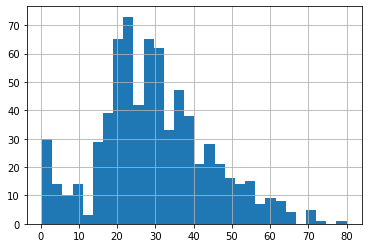

In [57]:
pass_data.Age.hist(bins = 30)

In [64]:
pass_data.rename(columns = {'Sex': 'Sex'}, inplace=True)
pass_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
def get_last_name(name):
    return name.split('.')[0].strip()

last_names = pass_data['Name'].apply(get_last_name)
last_names.head()

0         Braund, Mr
1       Cumings, Mrs
2    Heikkinen, Miss
3      Futrelle, Mrs
4          Allen, Mr
Name: Name, dtype: object

In [72]:
pass_data['Last_name'] = last_names
pass_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr"


In [73]:
pass_data.drop('Last_name', axis=1, inplace=True)
pass_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
pass_data.sort_values(by=['Pclass', 'Fare'], ascending=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S


In [80]:
pass_data.sort_values(by=['Pclass', 'Fare'], ascending=[True, False]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S


In [81]:
pass_data.groupby('Sex')

In [83]:
pass_data.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [84]:
pass_data.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [85]:
pass_data.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [86]:
pass_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [87]:
pass_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [88]:
pass_data.groupby('Sex', as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908
